In [1]:
def graph(code):

    import talib
    import yfinance as yf
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    import pandas as pd

    # 데이터 다운로드
    # stock_data = yf.download('229200.KS')
    data = pd.read_csv('price_ver_final.csv')
    data['종목코드'] = data['종목코드'].astype(str).str.zfill(6)
    stock_data = data[data['종목코드']==code]
    name = pd.read_csv('fs_ver_3.0.csv')
    name['티커'] = name['티커'].astype(str).str.zfill(6)
    code_name = name[name['티커']==code]['회사명'].unique()
    # 최근 500일 데이터만 가져오기 (복사본 생성)
    stock_data = stock_data.tail(500).copy()

    import matplotlib.font_manager
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    import matplotlib.font_manager as fm
    font_list = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
    [matplotlib.font_manager.FontProperties(fname=font).get_name() for font in font_list if 'Nanum' in font]
    plt.rc('font', family='NanumGothic')
    mpl.rcParams['axes.unicode_minus'] = False
    # SMA 계산 및 할당
    stock_data['SMA_20'] = talib.SMA(stock_data['Close'], 20)
    stock_data['SMA_60'] = talib.SMA(stock_data['Close'], 60)

    # RSI 계산
    stock_data['RSI_14'] = talib.RSI(stock_data['Close'], 14)
    stock_data['RSI_14'].fillna(0, inplace=True)

    # 볼린저 밴드 계산
    upper_2sd, mid_2sd, lower_2sd = talib.BBANDS(stock_data['Close'], nbdevup=2, nbdevdn=2, timeperiod=20)

    # 그래프 설정
    fig = plt.figure(figsize=(14, 10))
    gs = gridspec.GridSpec(nrows=3, ncols=1, height_ratios=[2,1,1], hspace=0.1)

    # 주가 및 이동평균선 그리기
    ax1 = plt.subplot(gs[0])
    ax1.plot(stock_data.index, stock_data['Close'], label='Close', color='black', lw=1)
    ax1.plot(stock_data.index, stock_data['SMA_20'], label='SMA 20', color='blue', lw=1)
    ax1.plot(stock_data.index, stock_data['SMA_60'], label='SMA 60', color='red', lw=1)
    ax1.fill_between(stock_data.index, lower_2sd, upper_2sd, color='grey', alpha=0.3)
    ax1.set_title(f'{code_name} Stock Price & Technical Indicators')
    ax1.set_ylabel('Stock Price')
    ax1.legend(loc='upper left')
    ax1.grid(True, color='grey', linestyle='--', linewidth=0.5, alpha=0.5)

    # RSI 그리기
    ax2 = plt.subplot(gs[1], sharex=ax1)
    ax2.plot(stock_data.index, stock_data['RSI_14'], label='RSI', color='black', lw=1)
    ax2.axhline(y=70, color='red', linestyle='--', lw=1)
    ax2.axhline(y=30, color='red', linestyle='--', lw=1)
    ax2.fill_between(stock_data.index, y1=30, y2=70, color='grey', alpha=0.1)
    ax2.set_ylabel('RSI')
    ax2.set_ylim(0, 100)
    ax2.legend(loc='upper left')
    ax2.grid(True, color='grey', linestyle='--', linewidth=0.5, alpha=0.5)

    # 볼린저 밴드 그리기
    ax3 = plt.subplot(gs[2], sharex=ax1)
    ax3.plot(stock_data.index, stock_data['Close'], label='Close', color='black', lw=1)
    ax3.plot(stock_data.index, mid_2sd, label='Mid Band', color='green', lw=1)
    ax3.plot(stock_data.index, upper_2sd, label='Upper Band', color='red', lw=1)
    ax3.plot(stock_data.index, lower_2sd, label='Lower Band', color='blue', lw=1)
    ax3.set_ylabel('Bollinger Bands')
    ax3.legend(loc='upper left')
    ax3.grid(True, color='grey', linestyle='--', linewidth=0.5, alpha=0.5)

    plt.tight_layout()
    plt.show()


C:\Users\성현태\AppData\Local\Temp\ipykernel_19632\646396045.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


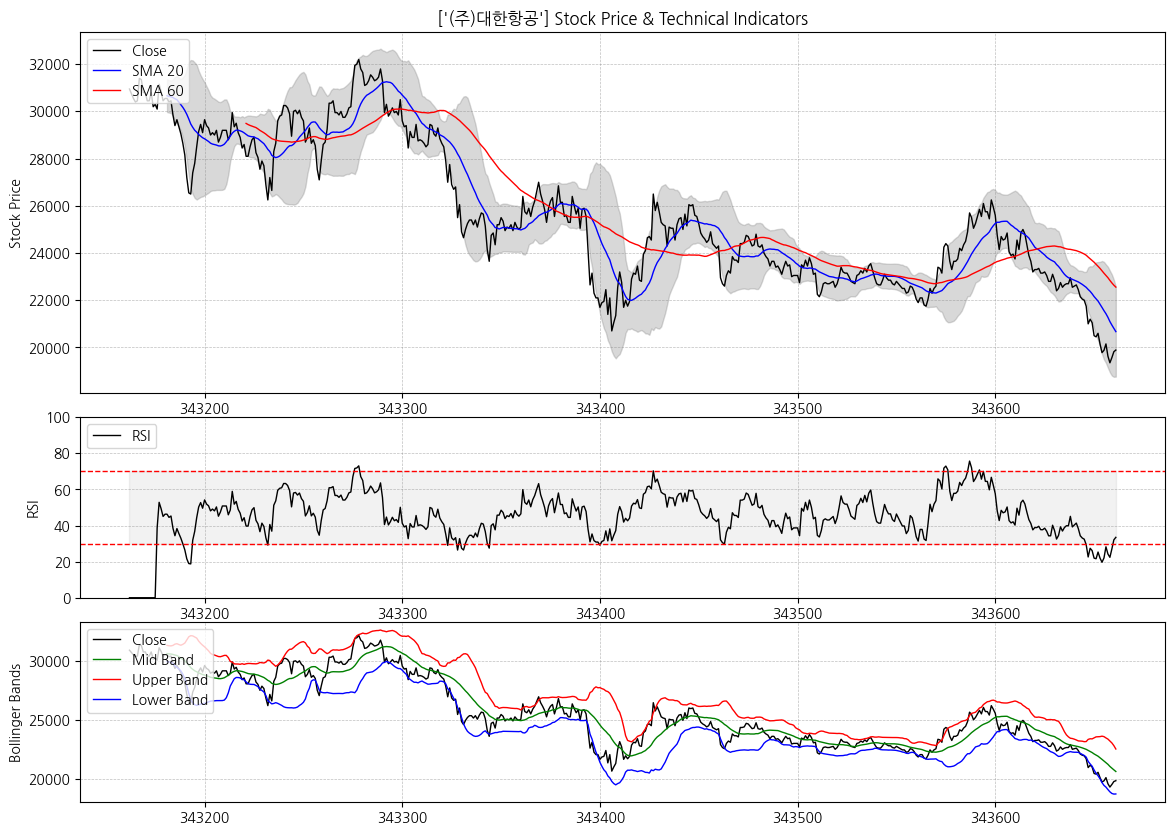

In [2]:
graph('003490')

In [1]:
import talib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import matplotlib.font_manager as fm

def graph(code):
    # 데이터 불러오기
    data = pd.read_csv('price_ver_final.csv')
    data['종목코드'] = data['종목코드'].astype(str).str.zfill(6)
    stock_data = data[data['종목코드'] == code].tail(500).copy()
    
    name = pd.read_csv('fs_ver_3.0.csv')
    name['티커'] = name['티커'].astype(str).str.zfill(6)
    code_name = name[name['티커'] == code]['회사명'].unique()[0]
    
    # 폰트 설정
    font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
    selected_font = [font for font in font_list if 'Nanum' in font]
    if selected_font:
        plt.rc('font', family=fm.FontProperties(fname=selected_font[0]).get_name())
    
    # 기술 지표 계산
    stock_data['SMA_20'] = talib.SMA(stock_data['Close'], 20)
    stock_data['SMA_60'] = talib.SMA(stock_data['Close'], 60)
    stock_data['RSI_14'] = talib.RSI(stock_data['Close'], 14).fillna(0)
    upper_2sd, mid_2sd, lower_2sd = talib.BBANDS(stock_data['Close'], nbdevup=2, nbdevdn=2, timeperiod=20)

    # 그래프 설정 및 출력
    fig = plt.figure(figsize=(14, 10))
    gs = gridspec.GridSpec(nrows=3, ncols=1, height_ratios=[2, 1, 1], hspace=0.1)
    
    # 주가 및 이동평균선 그래프
    ax1 = plt.subplot(gs[0])
    ax1.plot(stock_data.index, stock_data['Close'], label='Close', color='black')
    ax1.plot(stock_data.index, stock_data['SMA_20'], label='SMA 20', color='blue')
    ax1.plot(stock_data.index, stock_data['SMA_60'], label='SMA 60', color='red')
    ax1.fill_between(stock_data.index, lower_2sd, upper_2sd, color='grey', alpha=0.3)
    ax1.set_title(f'{code_name} Stock Price & Technical Indicators')
    ax1.legend(loc='upper left')
    ax1.grid(True, color='grey', linestyle='--', linewidth=0.5, alpha=0.5)
    
    # RSI 그래프
    ax2 = plt.subplot(gs[1], sharex=ax1)
    ax2.plot(stock_data.index, stock_data['RSI_14'], label='RSI', color='black')
    ax2.axhline(y=70, color='red', linestyle='--')
    ax2.axhline(y=30, color='red', linestyle='--')
    ax2.fill_between(stock_data.index, y1=30, y2=70, color='grey', alpha=0.1)
    ax2.set_ylim(0, 100)
    ax2.legend(loc='upper left')
    ax2.grid(True, color='grey', linestyle='--', linewidth=0.5, alpha=0.5)
    
    # 볼린저 밴드 그래프
    ax3 = plt.subplot(gs[2], sharex=ax1)
    ax3.plot(stock_data.index, stock_data['Close'], label='Close', color='black')
    ax3.plot(stock_data.index, mid_2sd, label='Mid Band', color='green')
    ax3.plot(stock_data.index, upper_2sd, label='Upper Band', color='red')
    ax3.plot(stock_data.index, lower_2sd, label='Lower Band', color='blue')
    ax3.legend(loc='upper left')
    ax3.grid(True, color='grey', linestyle='--', linewidth=0.5, alpha=0.5)

    plt.tight_layout()
    plt.show()

# 코드 최적화 완료. 함수 반환.
graph

<function __main__.graph(code)>

C:\Users\성현태\AppData\Local\Temp\ipykernel_8572\765441909.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


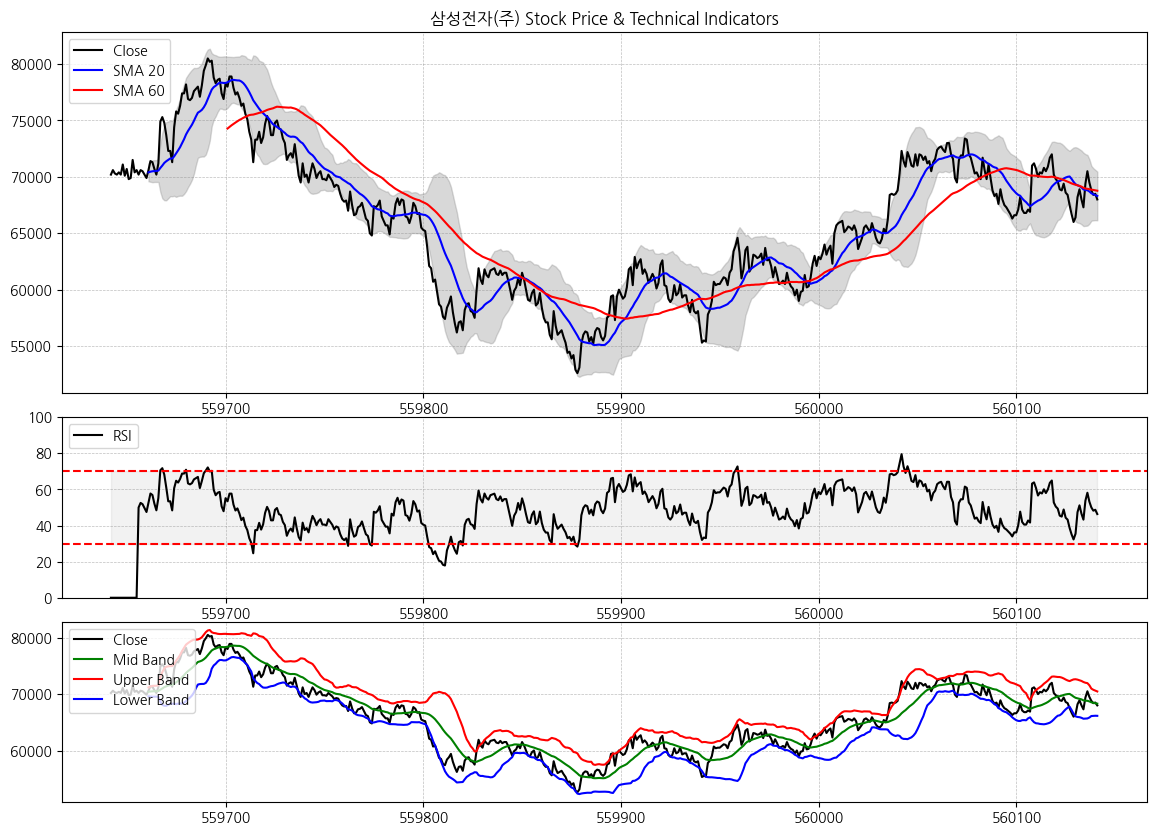

In [3]:
graph('005930')

In [8]:
import pandas as pd
pricedata = pd.read_csv('price_ver_final.csv')


In [9]:
len(pricedata[pricedata['Open']==0]['종목코드'].unique())

432